In [2]:
# Import necessary libraries
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set dataset path
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'

# Check if path exists
if not os.path.exists(dataset_path):
    print("Error: Dataset path does not exist! Please check the path setting.")
else:
    print("Dataset path exists, checking file structure...")

    # List files and subdirectories in dataset directory
    for root, dirs, files in os.walk(dataset_path):
        print(f"Directory: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files[:10]}")  # Show only first 10 files
        print("-" * 50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset path exists, checking file structure...
Directory: /content/drive/MyDrive/模型训练/Anti-UAV410-Processed
Subdirectories: ['labels', 'images']
Files: []
--------------------------------------------------
Directory: /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels
Subdirectories: ['test', 'train', 'val']
Files: ['train.cache', 'val.cache', 'test.cache']
--------------------------------------------------
Directory: /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels/test
Subdirectories: []
Files: ['20190925_111757_1_2_000519.txt', '20190925_111757_1_2_000617.txt', '20190925_111757_1_3_000042.txt', '20190925_111757_1_2_000391.txt', '20190925_111757_1_2_000528.txt', '20190925_111757_1_2_000746.txt', '20190925_111757_1_2_000792.txt', '20190925_111757_1_2_000549.txt', '20190925_111757_1_2_000984.txt', '20190925_111757_1_2_000632.txt']
--------------

In [3]:
# Install necessary dependencies
import os
import sys

# Update pip to the latest version
!{sys.executable} -m pip install --upgrade pip

# Install ultralytics library (includes YOLOv8)
!pip install ultralytics

# 安Install OpenCV and related libraries
!pip install opencv-python opencv-python-headless

# Verify installation
try:
    import ultralytics
    import cv2
    print("Success: ultralytics and OpenCV are installed correctly.")
    print(f"ultralytics version: {ultralytics.__version__}")
    print(f"OpenCV version: {cv2.__version__}")
except ImportError as e:
    print(f"Error: Failed to import required libraries. {str(e)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 146.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 134.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 147.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 

Number of images: 23224
Number of labels: 23224
All images have corresponding labels.
Visualizing: 01_1667_0001-1500_000001.jpg


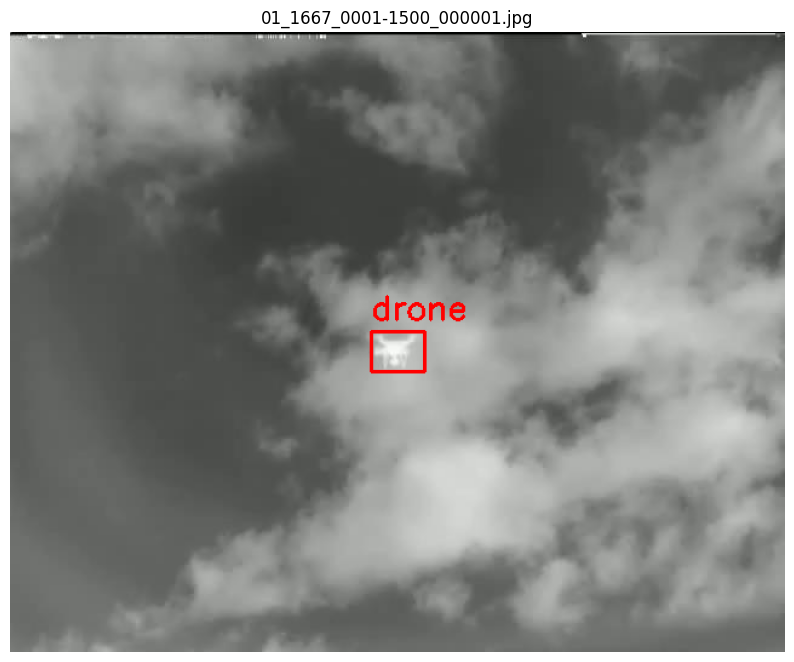

Visualizing: 01_1667_0001-1500_000002.jpg


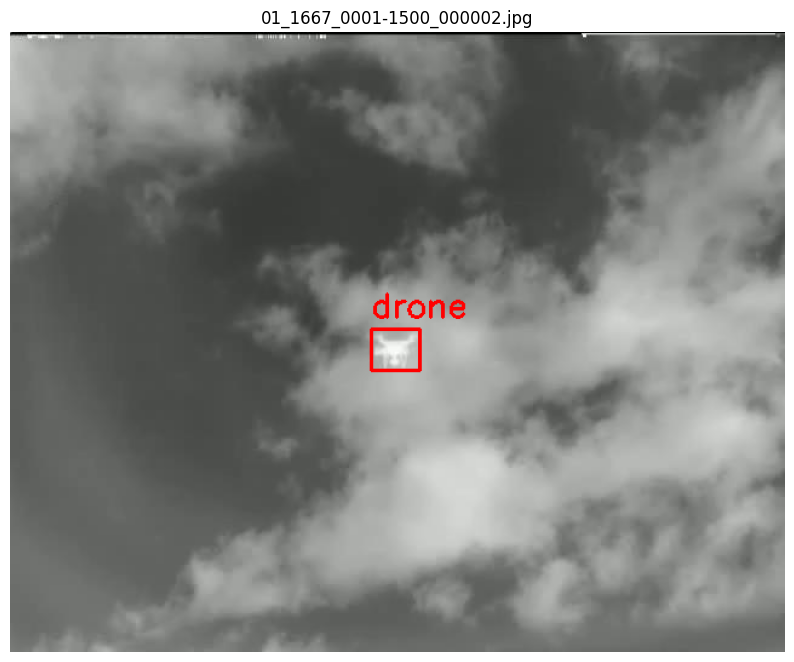

Visualizing: 01_1667_0001-1500_000003.jpg


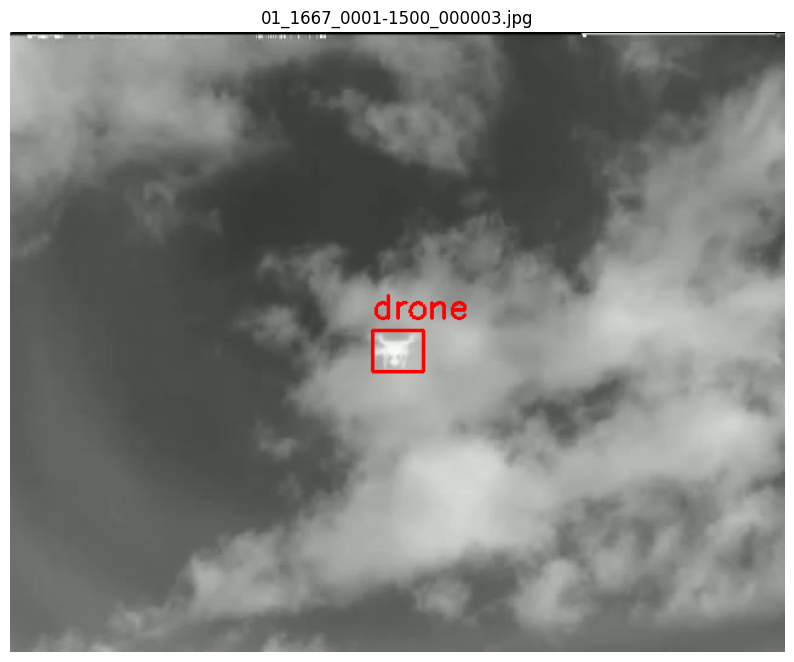

YAML configuration file created at: /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/data.yaml


In [5]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set dataset path
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
images_path = os.path.join(dataset_path, 'images', 'train')
labels_path = os.path.join(dataset_path, 'labels', 'train')

# Check if image and label files match
image_files = sorted([f for f in os.listdir(images_path) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(labels_path) if f.endswith('.txt') and not f.endswith('.cache')])
print(f"Number of images: {len(image_files)}")
print(f"Number of labels: {len(label_files)}")

# Verify file matching
mismatched = [img for img in image_files if img.replace('.jpg', '.txt') not in label_files]
if mismatched:
    print(f"Mismatched images without labels: {mismatched}")
else:
    print("All images have corresponding labels.")

# Define function to visualize image and bounding boxes
def plot_image_with_boxes(image_path, label_path, class_names=['drone']):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Read label file
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Draw bounding boxes
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
        x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
        x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, class_names[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.show()

# Visualize first 3 training images
for i in range(min(3, len(image_files))):
    img_file = image_files[i]
    lbl_file = img_file.replace('.jpg', '.txt')
    img_path = os.path.join(images_path, img_file)
    lbl_path = os.path.join(labels_path, lbl_file)
    if os.path.exists(lbl_path):
        print(f"Visualizing: {img_file}")
        plot_image_with_boxes(img_path, lbl_path)

# Create YAML configuration file for YOLOv8
yaml_content = f"""
path: {dataset_path}  # Dataset root path
train: images/train  # Training images path
val: images/val  # Validation images path
test: images/test  # Test images path
nc: 1  # Number of classes
names: ['drone']  # Class names
"""
yaml_path = os.path.join(dataset_path, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)
print(f"YAML configuration file created at: {yaml_path}")

In [6]:
# Import necessary libraries
from ultralytics import YOLO
import os

# Set dataset and output paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
yaml_path = os.path.join(dataset_path, 'data.yaml')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results'
os.makedirs(output_path, exist_ok=True)

# Check if YAML file exists
if not os.path.exists(yaml_path):
    print("Error: data.yaml file not found. Please check the dataset directory.")
else:
    print("data.yaml file found. Proceeding with training...")

    # Load YOLOv8 model
    model = YOLO('yolov8n.pt')  # Use pretrained YOLOv8n model

    # Train the model
    results = model.train(
        data=yaml_path,  # Dataset configuration file
        epochs=10,  # Number of epochs
        imgsz=640,  # Image size
        batch=16,  # Batch size
        name='anti_uav',  # Training task name
        project=output_path,  # Output directory
        device=0,  # Use GPU
        patience=5,  # Early stopping patience
        save=True,  # Save model weights
        verbose=True  # Show detailed logs
    )

    # Print training results
    print("Training completed. Results saved to:", output_path)

data.yaml file found. Proceeding with training...


100%|██████████| 6.25M/6.25M [00:00<00:00, 371MB/s]


Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/模型训练/Anti-UAV410-Processed/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=anti_uav, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspect

100%|██████████| 755k/755k [00:00<00:00, 94.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 222MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 109.3±243.3 ms, read: 0.0±0.0 MB/s, size: 15.2 KB)


train: Scanning /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels/train.cache... 23224 images, 1025 backgrounds, 0 corrupt: 100%|██████████| 23224/23224 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 19.5 KB)


val: Scanning /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels/val.cache... 8500 images, 47 backgrounds, 0 corrupt: 100%|██████████| 8500/8500 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.07G      1.429      1.516      1.057          7        640: 100%|██████████| 1452/1452 [1:22:53<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:35<00:00,  7.58it/s]


                   all       8500       8453      0.933      0.797       0.87      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.32G      1.347     0.6789      1.059          7        640: 100%|██████████| 1452/1452 [02:14<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:34<00:00,  7.79it/s]

                   all       8500       8453      0.787      0.827      0.865      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.32G      1.301     0.6202      1.043          8        640: 100%|██████████| 1452/1452 [02:11<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.85it/s]

                   all       8500       8453      0.959      0.761      0.831       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.32G      1.262     0.5833      1.031          8        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.88it/s]

                   all       8500       8453      0.963      0.788      0.876      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.32G      1.221     0.5502      1.019          8        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.90it/s]

                   all       8500       8453      0.964      0.779      0.883      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.32G      1.185     0.5223      1.007          7        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.95it/s]

                   all       8500       8453      0.953      0.809      0.895      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.33G       1.16     0.4997     0.9958          8        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.91it/s]


                   all       8500       8453      0.967      0.802      0.889      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.33G      1.129     0.4781     0.9883          7        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.89it/s]

                   all       8500       8453      0.956      0.846      0.905      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.33G        1.1     0.4564     0.9794          3        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:33<00:00,  7.91it/s]


                   all       8500       8453      0.952      0.837      0.909      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.33G      1.075      0.438     0.9699          7        640: 100%|██████████| 1452/1452 [02:10<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:34<00:00,  7.78it/s]

                   all       8500       8453      0.947      0.818       0.89      0.563



10 epochs completed in 1.810 hours.
Optimizer stripped from /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 266/266 [00:35<00:00,  7.39it/s]


                   all       8500       8453      0.951      0.837      0.909      0.566
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav
Training completed. Results saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results


Model file found: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt
YOLOv8 model loaded successfully.
Number of test images selected: 100

0: 512x640 1 drone, 0.6ms
1: 512x640 1 drone, 0.6ms
2: 512x640 1 drone, 0.6ms
3: 512x640 1 drone, 0.6ms
4: 512x640 1 drone, 0.6ms
5: 512x640 1 drone, 0.6ms
6: 512x640 1 drone, 0.6ms
7: 512x640 1 drone, 0.6ms
8: 512x640 1 drone, 0.6ms
9: 512x640 1 drone, 0.6ms
10: 512x640 1 drone, 0.6ms
11: 512x640 1 drone, 0.6ms
12: 512x640 1 drone, 0.6ms
13: 512x640 1 drone, 0.6ms
14: 512x640 1 drone, 0.6ms
15: 512x640 1 drone, 0.6ms
16: 512x640 1 drone, 0.6ms
17: 512x640 1 drone, 0.6ms
18: 512x640 1 drone, 0.6ms
19: 512x640 1 drone, 0.6ms
20: 512x640 1 drone, 0.6ms
21: 512x640 1 drone, 0.6ms
22: 512x640 1 drone, 0.6ms
23: 512x640 1 drone, 0.6ms
24: 512x640 1 drone, 0.6ms
25: 512x640 1 drone, 0.6ms
26: 512x640 1 drone, 0.6ms
27: 512x640 1 drone, 0.6ms
28: 512x640 1 drone, 0.6ms
29: 512x640 1 drone, 0.6ms
30: 512x640 1 drone, 0.6ms
31: 512x640 1 dr

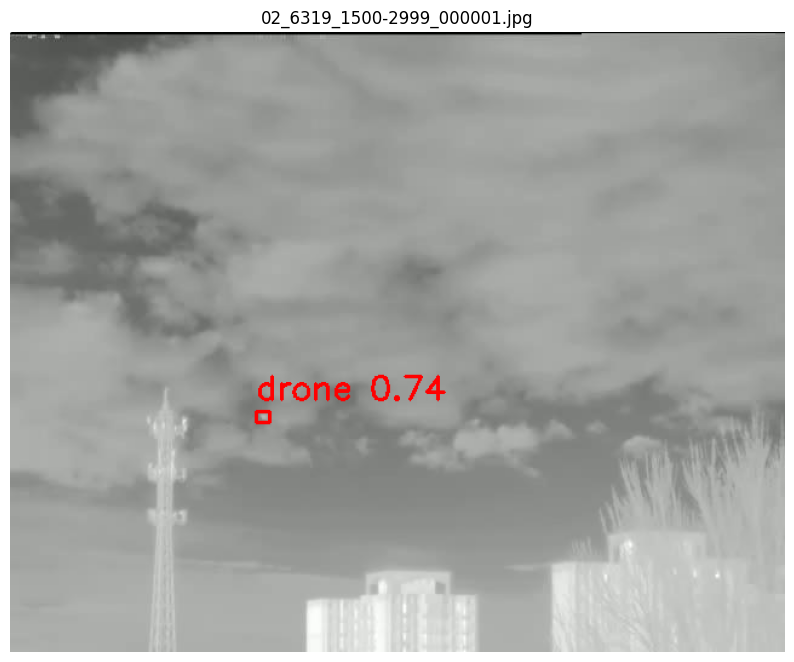

Detection video saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/test_results/test_inference/detection_video.mp4
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 14.1 KB)


val: Scanning /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels/test.cache... 12771 images, 1305 backgrounds, 0 corrupt: 100%|██████████| 13848/13848 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 866/866 [45:53<00:00,  3.18s/it]


                   all      13848      12543       0.77      0.652      0.652      0.362
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
Test set validation metrics:
mAP@50: 0.6522
mAP@50:95: 0.3620


In [7]:
# Import necessary libraries
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

# Set paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
yaml_path = os.path.join(dataset_path, 'data.yaml')
model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt'
test_images_path = os.path.join(dataset_path, 'images', 'test')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/test_results'
os.makedirs(output_path, exist_ok=True)

# Check if model file exists
if not os.path.exists(model_path):
    print(f"Error: Model file {model_path} not found!")
    raise FileNotFoundError(f"Model file {model_path} not found")
print(f"Model file found: {model_path}")

# Load YOLOv8 model
try:
    model = YOLO(model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Get first 100 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:100]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]
print(f"Number of test images selected: {len(test_image_paths)}")

# Run inference on first 100 test images
try:
    start_time = time.time()
    results = model.predict(
        source=test_image_paths,
        conf=0.5,  # Confidence threshold
        iou=0.7,   # IoU threshold
        save=True, # Save detection results
        save_txt=True,  # Save label files
        save_conf=True, # Save confidence scores
        project=output_path,
        name='test_inference',
        exist_ok=True
    )
    inference_time = time.time() - start_time
    print(f"Inference completed for {len(test_image_paths)} images. Total time: {inference_time:.2f} seconds")
    print(f"Average inference time per image: {inference_time / len(test_image_paths) * 1000:.2f} ms")
    print(f"Results saved to: {output_path}/test_inference")
except Exception as e:
    print(f"Error: Inference failed. {str(e)}")
    raise

# Define visualization function
def visualize_predictions(image_path, result, class_names=['drone']):
    # Read original image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read image {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw detection boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        label = f"{class_names[cls]} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.show()

# Visualize the first test image
if test_image_files:
    img_file = test_image_files[0]
    img_path = os.path.join(test_images_path, img_file)
    print(f"Visualizing: {img_file}")
    result = next((r for r in results if os.path.basename(r.path) == img_file), None)
    if result:
        visualize_predictions(img_path, result)
    else:
        print(f"Error: No detection result for {img_file}")

# Generate detection video
try:
    video_path = os.path.join(output_path, 'test_inference', 'detection_video.mp4')
    frame_size = (640, 640)  # Image size is 640x640
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(video_path, fourcc, 10.0, frame_size)

    for img_file, result in zip(test_image_files, results):
        img_path = os.path.join(test_images_path, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, frame_size)

        # Draw detection boxes
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            label = f"{['drone'][cls]} {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        video_writer.write(img)

    video_writer.release()
    print(f"Detection video saved to: {video_path}")
except Exception as e:
    print(f"Error: Failed to generate detection video. {str(e)}")

# Validate test set performance
try:
    metrics = model.val(data=yaml_path, split='test', device=0)
    print("Test set validation metrics:")
    print(f"mAP@50: {metrics.box.map50:.4f}")
    print(f"mAP@50:95: {metrics.box.map:.4f}")
except Exception as e:
    print(f"Error: Test set validation failed. {str(e)}")

YOLOv8 model loaded successfully.
PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 322MB/s]

YOLOv5 model loaded successfully.
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 13.1±9.2 MB/s, size: 16.4 KB)


val: Scanning /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels/test.cache... 12771 images, 1305 backgrounds, 0 corrupt: 100%|██████████| 13848/13848 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 866/866 [02:16<00:00,  6.36it/s]


                   all      13848      12543       0.77      0.652      0.652      0.362
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val2
YOLOv8 test set metrics:
mAP@50: 0.6522
mAP@50:95: 0.3620
Inference time per image: 0.66 ms
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv5n summary (fused): 84 layers, 2,649,200 parameters, 0 gradients, 7.7 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 15.1±9.9 MB/s, size: 19.6 KB)


val: Scanning /content/drive/MyDrive/模型训练/Anti-UAV410-Processed/labels/test.cache... 12771 images, 1305 backgrounds, 0 corrupt: 100%|██████████| 13848/13848 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 866/866 [02:16<00:00,  6.34it/s]


                   all      13848      12543     0.0282      0.132      0.016    0.00845
                person      12543      12543     0.0282      0.132      0.016    0.00845
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val3
YOLOv5 test set metrics:
mAP@50: 0.0160
mAP@50:95: 0.0084
Inference time per image: 0.70 ms


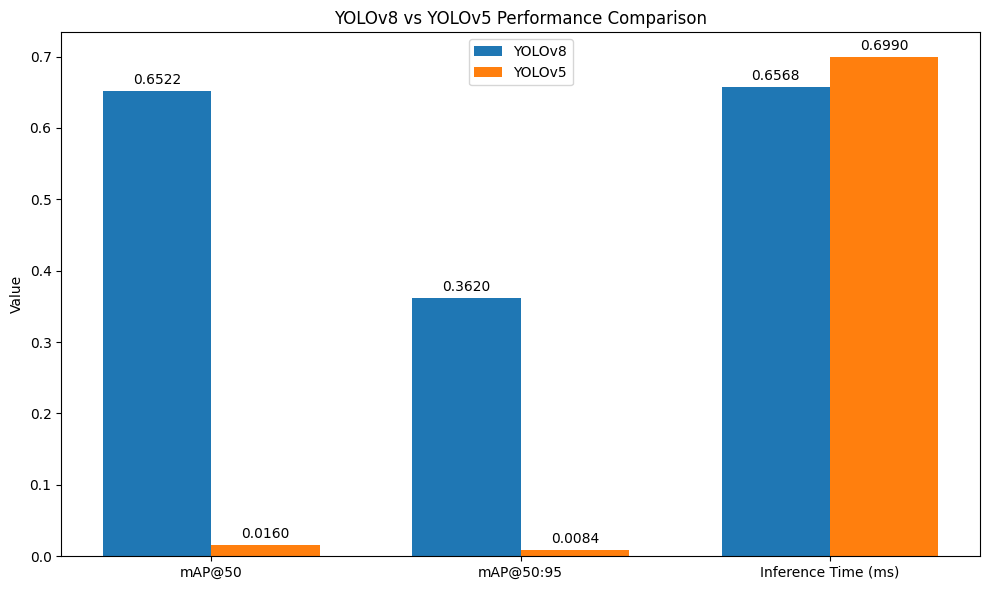

Comparison chart saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/comparison_results/comparison_chart.png


In [8]:
# Import necessary libraries
from ultralytics import YOLO
import os
import time
import matplotlib.pyplot as plt
import numpy as np

# Set paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
yaml_path = os.path.join(dataset_path, 'data.yaml')
yolov8_model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt'
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/comparison_results'
os.makedirs(output_path, exist_ok=True)

# Load YOLOv8 model
try:
    yolov8_model = YOLO(yolov8_model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Load YOLOv5 model (baseline)
try:
    yolov5_model = YOLO('yolov5n.pt')  # Use pretrained YOLOv5n model
    print("YOLOv5 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv5 model. {str(e)}")
    raise

# Validate YOLOv8 performance (test set)
try:
    yolov8_metrics = yolov8_model.val(data=yaml_path, split='test', device=0)
    yolov8_map50 = yolov8_metrics.box.map50
    yolov8_map = yolov8_metrics.box.map
    yolov8_speed = yolov8_metrics.speed['inference']  # Inference time (ms)
    print("YOLOv8 test set metrics:")
    print(f"mAP@50: {yolov8_map50:.4f}")
    print(f"mAP@50:95: {yolov8_map:.4f}")
    print(f"Inference time per image: {yolov8_speed:.2f} ms")
except Exception as e:
    print(f"Error: YOLOv8 validation failed. {str(e)}")
    raise

# Validate YOLOv5 performance
try:
    yolov5_metrics = yolov5_model.val(data=yaml_path, split='test', device=0)
    yolov5_map50 = yolov5_metrics.box.map50
    yolov5_map = yolov5_metrics.box.map
    yolov5_speed = yolov5_metrics.speed['inference']  # Inference time (ms)
    print("YOLOv5 test set metrics:")
    print(f"mAP@50: {yolov5_map50:.4f}")
    print(f"mAP@50:95: {yolov5_map:.4f}")
    print(f"Inference time per image: {yolov5_speed:.2f} ms")
except Exception as e:
    print(f"Error: YOLOv5 validation failed. {str(e)}")
    raise

# Generate comparison chart
metrics = ['mAP@50', 'mAP@50:95', 'Inference Time (ms)']
yolov8_values = [yolov8_map50, yolov8_map, yolov8_speed]
yolov5_values = [yolov5_map50, yolov5_map, yolov5_speed]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, yolov8_values, width, label='YOLOv8', color='#1f77b4')
rects2 = ax.bar(x + width/2, yolov5_values, width, label='YOLOv5', color='#ff7f0e')

ax.set_ylabel('Value')
ax.set_title('YOLOv8 vs YOLOv5 Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
chart_path = os.path.join(output_path, 'comparison_chart.png')
plt.savefig(chart_path)
plt.show()
print(f"Comparison chart saved to: {chart_path}")

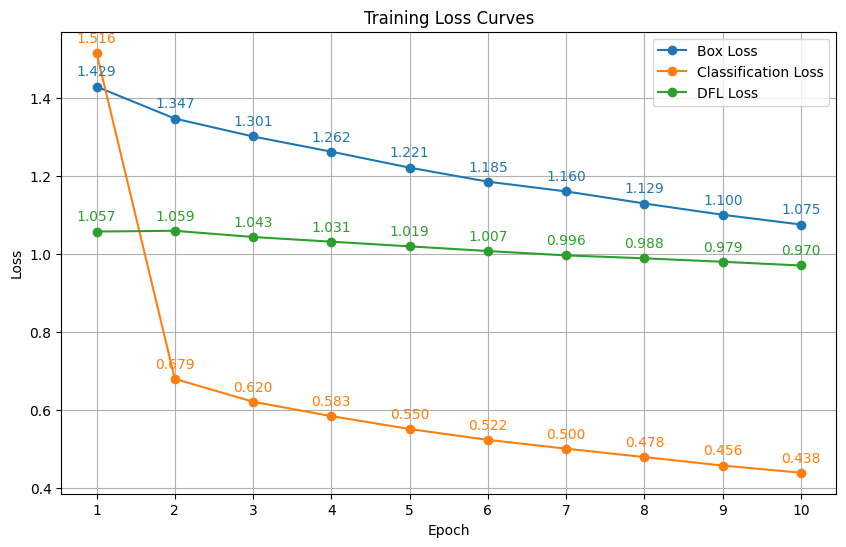

Loss curve saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/loss_curve.png


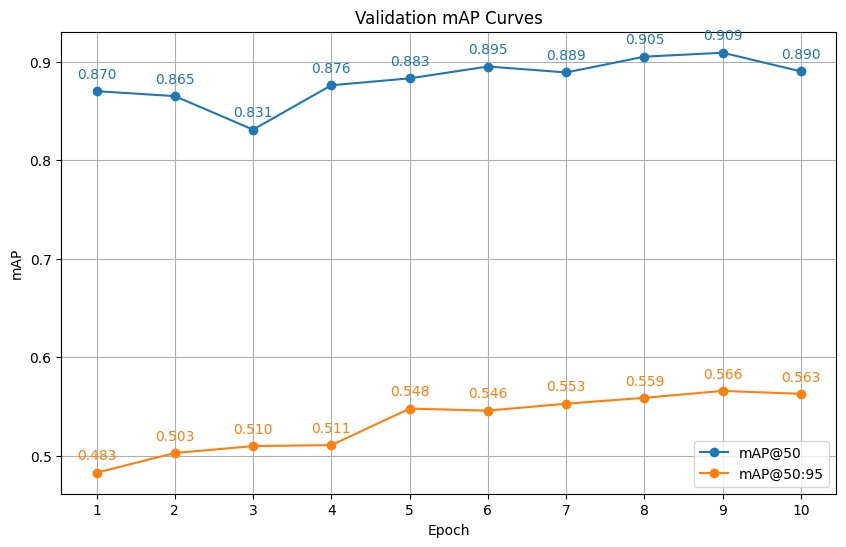

mAP curve saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/map_curve.png


In [11]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np

# Set output path
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Training log data
epochs = list(range(1, 11))
box_loss = [1.429, 1.347, 1.301, 1.262, 1.221, 1.185, 1.16, 1.129, 1.1, 1.075]
cls_loss = [1.516, 0.6789, 0.6202, 0.5833, 0.5502, 0.5223, 0.4997, 0.4781, 0.4564, 0.438]
dfl_loss = [1.057, 1.059, 1.043, 1.031, 1.019, 1.007, 0.9958, 0.9883, 0.9794, 0.9699]
map_50 = [0.87, 0.865, 0.831, 0.876, 0.883, 0.895, 0.889, 0.905, 0.909, 0.89]
map_50_95 = [0.483, 0.503, 0.51, 0.511, 0.548, 0.546, 0.553, 0.559, 0.566, 0.563]

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, box_loss, label='Box Loss', color='#1f77b4', marker='o')
plt.plot(epochs, cls_loss, label='Classification Loss', color='#ff7f0e', marker='o')
plt.plot(epochs, dfl_loss, label='DFL Loss', color='#2ca02c', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.grid(True)
plt.legend()
plt.xticks(epochs)

# Add value labels
for i, (bx, cl, df) in enumerate(zip(box_loss, cls_loss, dfl_loss)):
    plt.text(epochs[i], bx + 0.02, f'{bx:.3f}', ha='center', va='bottom', color='#1f77b4')
    plt.text(epochs[i], cl + 0.02, f'{cl:.3f}', ha='center', va='bottom', color='#ff7f0e')
    plt.text(epochs[i], df + 0.02, f'{df:.3f}', ha='center', va='bottom', color='#2ca02c')

loss_chart_path = os.path.join(output_path, 'loss_curve.png')
plt.savefig(loss_chart_path)
plt.show()
print(f"Loss curve saved to: {loss_chart_path}")

# Plot mAP curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, map_50, label='mAP@50', color='#1f77b4', marker='o')
plt.plot(epochs, map_50_95, label='mAP@50:95', color='#ff7f0e', marker='o')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Validation mAP Curves')
plt.grid(True)
plt.legend()
plt.xticks(epochs)

# Add value labels
for i, (m50, m5095) in enumerate(zip(map_50, map_50_95)):
    plt.text(epochs[i], m50 + 0.01, f'{m50:.3f}', ha='center', va='bottom', color='#1f77b4')
    plt.text(epochs[i], m5095 + 0.01, f'{m5095:.3f}', ha='center', va='bottom', color='#ff7f0e')

map_chart_path = os.path.join(output_path, 'map_curve.png')
plt.savefig(map_chart_path)
plt.show()
print(f"mAP curve saved to: {map_chart_path}")

YOLOv8 model loaded successfully.
Detection samples already generated:
Detection sample 1: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/detection_sample_1.jpg
Detection sample 2: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/detection_sample_2.jpg
Detection sample 3: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/detection_sample_3.jpg
Detection sample 4: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/detection_sample_4.jpg
Detection sample 5: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/detection_sample_5.jpg


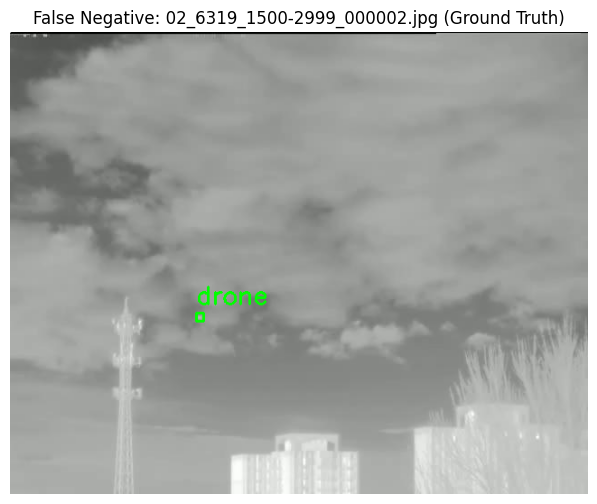

False negative saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/false_negative_1.jpg


In [13]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import random

# Set paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt'
test_images_path = os.path.join(dataset_path, 'images', 'test')
test_labels_path = os.path.join(dataset_path, 'labels', 'test')
inference_results_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/test_results/test_inference'
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Load YOLOv8 model
try:
    model = YOLO(model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Get the first 100 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:100]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]

# Load inference results
inference_label_path = os.path.join(inference_results_path, 'labels')
inference_labels = {f: os.path.join(inference_label_path, f) for f in os.listdir(inference_label_path) if f.endswith('.txt')}

# Define function to draw image with bounding boxes
def draw_boxes(image_path, boxes, class_names=['drone'], color=(255, 0, 0), is_ground_truth=False):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read image {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Draw bounding boxes
    for box in boxes:
        if is_ground_truth:  # class_id, x_center, y_center, width, height
            class_id, x_center, y_center, width, height = map(float, box.split())
            x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
            x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
            x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
            label = class_names[int(class_id)]
        else:  # class_id, x_center, y_center, width, height, conf
            class_id, x_center, y_center, width, height, conf = map(float, box.split())
            x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
            x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
            x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
            label = f"{class_names[int(class_id)]} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return img

# 1. Automatically select 5 detection samples
print("Detection samples already generated:")
for i in range(1, 6):
    print(f"Detection sample {i}: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/detection_sample_{i}.jpg")

# 2. False Positive and False Negative Analysis (1 image each)
false_positives = []
false_negatives = []
max_fp = 1  # Limit to 1 false positive
max_fn = 1  # Limit to 1 false negative

# First check the first 100 images
for img_file in test_image_files:
    label_file = img_file.replace('.jpg', '.txt')
    true_label_path = os.path.join(test_labels_path, label_file)
    inference_label_path = os.path.join(inference_label_path, label_file)

    # Read ground truth labels
    true_boxes = []
    if os.path.exists(true_label_path):
        with open(true_label_path, 'r') as f:
            true_boxes = f.readlines()

    # Read inference results
    inference_boxes = []
    if os.path.exists(inference_label_path):
        with open(inference_label_path, 'r') as f:
            inference_boxes = f.readlines()

    # False Positive: Inference has detection but no ground truth
    if len(true_boxes) == 0 and len(inference_boxes) > 0 and len(false_positives) < max_fp:
        false_positives.append((img_file, inference_boxes, true_boxes))
    # False Negative: Ground truth has target but no detection
    elif len(true_boxes) > 0 and len(inference_boxes) == 0 and len(false_negatives) < max_fn:
        false_negatives.append((img_file, inference_boxes, true_boxes))

    # Stop condition
    if len(false_positives) >= max_fp and len(false_negatives) >= max_fn:
        break

# Extend to more images if not enough samples found
if len(false_positives) < max_fp or len(false_negatives) < max_fn:
    extended_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[100:200]
    for img_file in extended_image_files:
        label_file = img_file.replace('.jpg', '.txt')
        true_label_path = os.path.join(test_labels_path, label_file)
        img_path = os.path.join(test_images_path, img_file)

        # Run inference
        results = model.predict(source=img_path, conf=0.5, iou=0.7, save=False, verbose=False)
        inference_boxes = []
        for result in results:
            for box in result.boxes:
                x_center, y_center, width, height = box.xywh[0].cpu().numpy() / np.array([640, 640, 640, 640])
                conf = box.conf[0].cpu().numpy()
                cls = box.cls[0].cpu().numpy()
                inference_boxes.append(f"{int(cls)} {x_center} {y_center} {width} {height} {conf}")

        # Read ground truth labels
        true_boxes = []
        if os.path.exists(true_label_path):
            with open(true_label_path, 'r') as f:
                true_boxes = f.readlines()

        # False Positive
        if len(true_boxes) == 0 and len(inference_boxes) > 0 and len(false_positives) < max_fp:
            false_positives.append((img_file, inference_boxes, true_boxes))
        # False Negative
        elif len(true_boxes) > 0 and len(inference_boxes) == 0 and len(false_negatives) < max_fn:
            false_negatives.append((img_file, inference_boxes, true_boxes))

        if len(false_positives) >= max_fp and len(false_negatives) >= max_fn:
            break

# Visualize false positive
for idx, (img_file, inference_boxes, true_boxes) in enumerate(false_positives, 1):
    img_path = os.path.join(test_images_path, img_file)
    img = draw_boxes(img_path, inference_boxes, color=(255, 0, 0), is_ground_truth=False)
    if img is None:
        continue

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'False Positive: {img_file}')
    plt.show()

    save_path = os.path.join(output_path, f'false_positive_{idx}.jpg')
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(save_path, img_bgr)
    print(f"False positive saved to: {save_path}")

# Visualize false negative
for idx, (img_file, inference_boxes, true_boxes) in enumerate(false_negatives, 1):
    img_path = os.path.join(test_images_path, img_file)
    img = draw_boxes(img_path, true_boxes, color=(0, 255, 0), is_ground_truth=True)
    if img is None:
        continue

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'False Negative: {img_file} (Ground Truth)')
    plt.show()

    save_path = os.path.join(output_path, f'false_negative_{idx}.jpg')
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(save_path, img_bgr)
    print(f"False negative saved to: {save_path}")

Models loaded successfully.


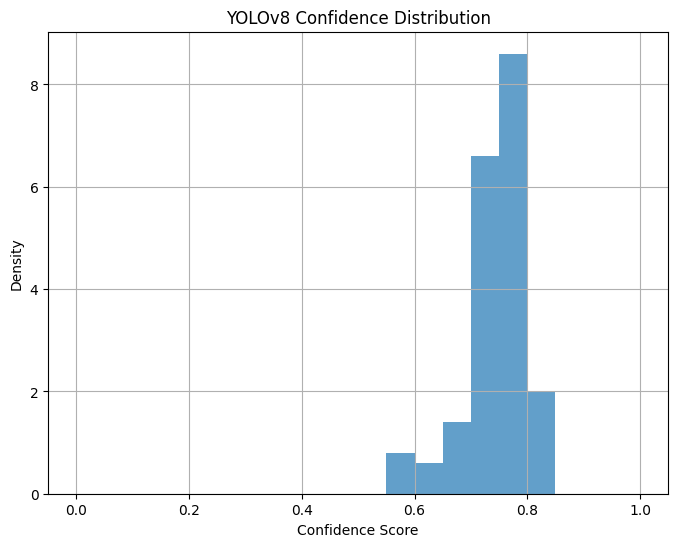

YOLOv8 confidence distribution saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/confidence_distribution_yolov8.png


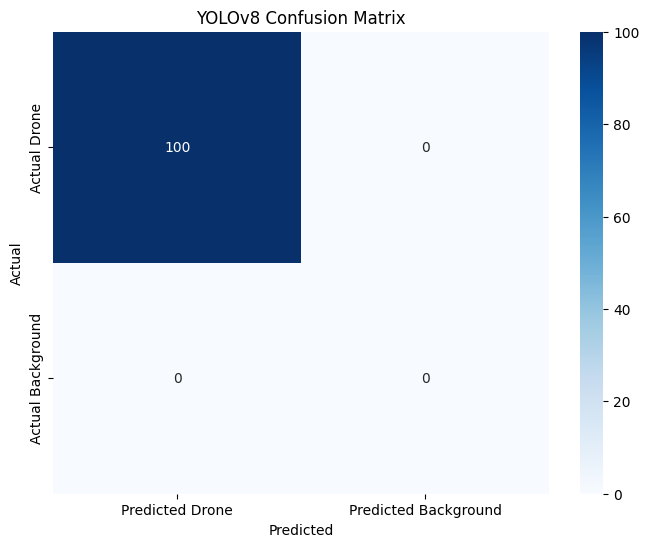

YOLOv8 confusion matrix saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/confusion_matrix_yolov8.png


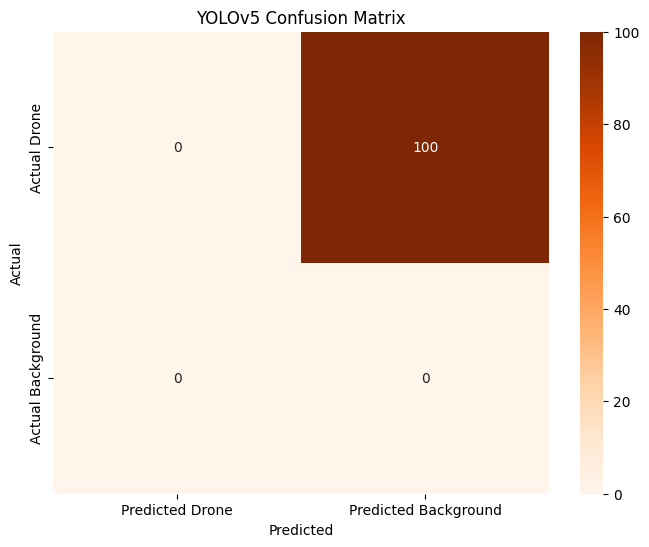

YOLOv5 confusion matrix saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/confusion_matrix_yolov5.png
False negative already generated:
False negative: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/false_negative_1.jpg


In [17]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ultralytics import YOLO

# Set paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
yolov8_model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt'
inference_results_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/test_results/test_inference'
test_images_path = os.path.join(dataset_path, 'images', 'test')
test_labels_path = os.path.join(dataset_path, 'labels', 'test')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Load models
try:
    yolov8_model = YOLO(yolov8_model_path)
    yolov5_model = YOLO('yolov5nu.pt')  # Use pretrained YOLOv5 model
    print("Models loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load models. {str(e)}")
    raise

# Get the first 100 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:100]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]

# 1. YOLOv8 Confidence Distribution
inference_label_path = os.path.join(inference_results_path, 'labels')
yolov8_confidences = []
for img_file in test_image_files:
    label_file = img_file.replace('.jpg', '.txt')
    inference_label_file = os.path.join(inference_label_path, label_file)
    if not os.path.exists(inference_label_file):
        continue
    with open(inference_label_file, 'r') as f:
        boxes = f.readlines()
    for box in boxes:
        _, _, _, _, _, conf = map(float, box.split())
        yolov8_confidences.append(conf)

# Plot YOLOv8 confidence distribution
plt.figure(figsize=(8, 6))
plt.hist(yolov8_confidences, bins=20, range=(0, 1), color='#1f77b4', alpha=0.7, density=True)
plt.xlabel('Confidence Score')
plt.ylabel('Density')
plt.title('YOLOv8 Confidence Distribution')
plt.grid(True)
conf_yolov8_path = os.path.join(output_path, 'confidence_distribution_yolov8.png')
plt.savefig(conf_yolov8_path)
plt.show()
print(f"YOLOv8 confidence distribution saved to: {conf_yolov8_path}")

# 2. Confusion Matrix
# Calculate YOLOv8 confusion matrix
yolov8_tp, yolov8_fp, yolov8_fn, yolov8_tn = 0, 0, 0, 0
for img_file in test_image_files:
    label_file = img_file.replace('.jpg', '.txt')
    true_label_path = os.path.join(test_labels_path, label_file)
    inference_label_file = os.path.join(inference_label_path, label_file)

    # Read ground truth labels
    true_boxes = []
    if os.path.exists(true_label_path):
        with open(true_label_path, 'r') as f:
            true_boxes = f.readlines()

    # Read inference results
    inference_boxes = []
    if os.path.exists(inference_label_file):
        with open(inference_label_file, 'r') as f:
            inference_boxes = f.readlines()

    # Calculate TP, FP, FN, TN
    has_true = len(true_boxes) > 0
    has_pred = len(inference_boxes) > 0
    if has_true and has_pred:
        yolov8_tp += 1  # True Positive
    elif has_true and not has_pred:
        yolov8_fn += 1  # False Negative
    elif not has_true and has_pred:
        yolov8_fp += 1  # False Positive
    else:
        yolov8_tn += 1  # True Negative

# Plot YOLOv8 confusion matrix
conf_matrix_yolov8 = np.array([[yolov8_tp, yolov8_fn], [yolov8_fp, yolov8_tn]])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_yolov8, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Drone', 'Predicted Background'],
            yticklabels=['Actual Drone', 'Actual Background'])
plt.title('YOLOv8 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm_yolov8_path = os.path.join(output_path, 'confusion_matrix_yolov8.png')
plt.savefig(cm_yolov8_path)
plt.show()
print(f"YOLOv8 confusion matrix saved to: {cm_yolov8_path}")

# Calculate YOLOv5 confusion matrix
yolov5_tp, yolov5_fp, yolov5_fn, yolov5_tn = 0, 0, 0, 0
for img_path in test_image_paths:
    img_file = os.path.basename(img_path)
    label_file = img_file.replace('.jpg', '.txt')
    true_label_path = os.path.join(test_labels_path, label_file)

    # Read ground truth labels
    true_boxes = []
    if os.path.exists(true_label_path):
        with open(true_label_path, 'r') as f:
            true_boxes = f.readlines()

    # Run inference
    results = yolov5_model.predict(source=img_path, conf=0.5, iou=0.7, save=False, verbose=False)
    inference_boxes = []
    for result in results:
        for box in result.boxes:
            inference_boxes.append(box)

    # Calculate TP, FP, FN, TN
    has_true = len(true_boxes) > 0
    has_pred = len(inference_boxes) > 0
    if has_true and has_pred:
        yolov5_tp += 1
    elif has_true and not has_pred:
        yolov5_fn += 1
    elif not has_true and has_pred:
        yolov5_fp += 1
    else:
        yolov5_tn += 1

# Plot YOLOv5 confusion matrix
conf_matrix_yolov5 = np.array([[yolov5_tp, yolov5_fn], [yolov5_fp, yolov5_tn]])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_yolov5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Drone', 'Predicted Background'],
            yticklabels=['Actual Drone', 'Actual Background'])
plt.title('YOLOv5 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm_yolov5_path = os.path.join(output_path, 'confusion_matrix_yolov5.png')
plt.savefig(cm_yolov5_path)
plt.show()
print(f"YOLOv5 confusion matrix saved to: {cm_yolov5_path}")

# 3.Print path of already generated false negative image
print("False negative already generated:")
print(f"False negative: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/false_negative_1.jpg")

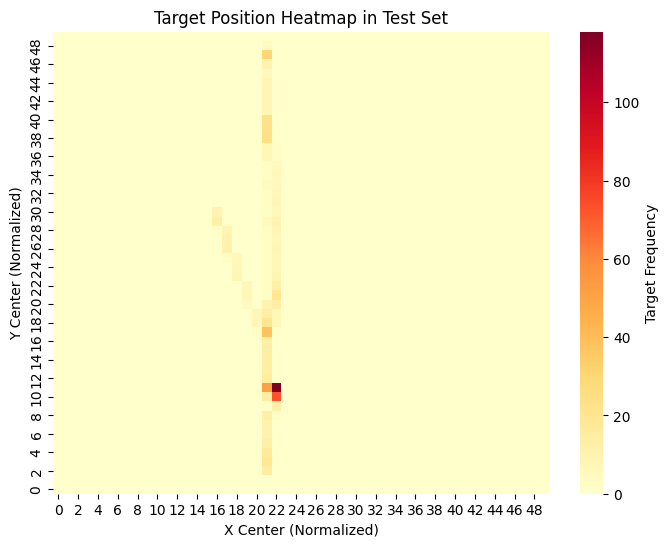

Target position heatmap saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/target_position_heatmap.png


In [18]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
test_labels_path = os.path.join(dataset_path, 'labels', 'test')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Collect target center positions
x_centers = []
y_centers = []
label_files = sorted([f for f in os.listdir(test_labels_path) if f.endswith('.txt') and not f.endswith('.cache')])[:1000]  # 限制为前1000张图像 / Limit to first 1000 images
for label_file in label_files:
    with open(os.path.join(test_labels_path, label_file), 'r') as f:
        boxes = f.readlines()
    for box in boxes:
        _, x_center, y_center, _, _ = map(float, box.split())
        x_centers.append(x_center)
        y_centers.append(y_center)

# Generate 2D heatmap
heatmap, xedges, yedges = np.histogram2d(x_centers, y_centers, bins=50, range=[[0, 1], [0, 1]])
heatmap = heatmap.T  # Transpose to match image coordinates

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='YlOrRd', cbar=True, cbar_kws={'label': 'Target Frequency'})
plt.xlabel('X Center (Normalized)')
plt.ylabel('Y Center (Normalized)')
plt.title('Target Position Heatmap in Test Set')
plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinates
heatmap_path = os.path.join(output_path, 'target_position_heatmap.png')
plt.savefig(heatmap_path)
plt.show()
print(f"Target position heatmap saved to: {heatmap_path}")

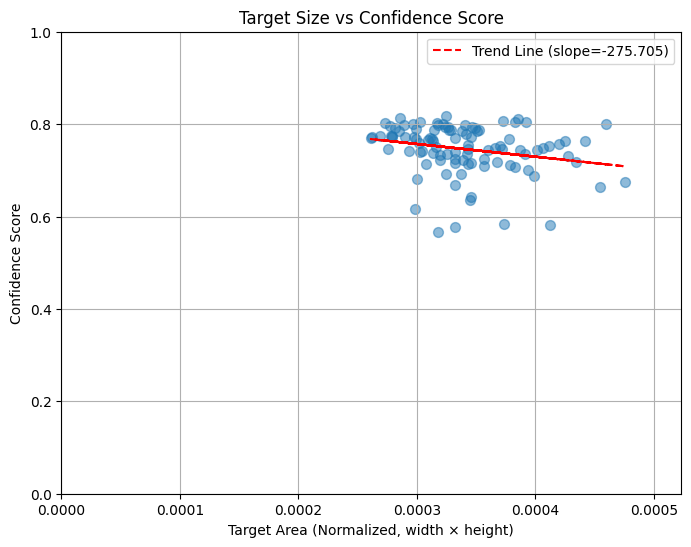

Target size vs confidence scatter plot saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/target_size_vs_confidence.png


In [19]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Set paths
inference_results_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/test_results/test_inference'
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Collect target sizes and confidences
areas = []
confidences = []
label_files = sorted([f for f in os.listdir(os.path.join(inference_results_path, 'labels')) if f.endswith('.txt')])[:1000]  # 限制为前1000张图像 / Limit to first 1000 images
for label_file in label_files:
    with open(os.path.join(inference_results_path, 'labels', label_file), 'r') as f:
        boxes = f.readlines()
    for box in boxes:
        _, _, _, width, height, conf = map(float, box.split())
        area = width * height  # Calculate area
        areas.append(area)
        confidences.append(conf)

# Convert to numpy arrays
areas = np.array(areas)
confidences = np.array(confidences)

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(areas, confidences, alpha=0.5, color='#1f77b4', s=50)
plt.xlabel('Target Area (Normalized, width × height)')
plt.ylabel('Confidence Score')
plt.title('Target Size vs Confidence Score')
plt.grid(True)
plt.xlim(0, max(areas) * 1.1)  # Set X-axis range
plt.ylim(0, 1)  # Set Y-axis range

# Add trend line
z = np.polyfit(areas, confidences, 1)
p = np.poly1d(z)
plt.plot(areas, p(areas), "r--", label=f'Trend Line (slope={z[0]:.3f})')
plt.legend()

scatter_path = os.path.join(output_path, 'target_size_vs_confidence.png')
plt.savefig(scatter_path)
plt.show()
print(f"Target size vs confidence scatter plot saved to: {scatter_path}")

YOLOv8 model loaded successfully.


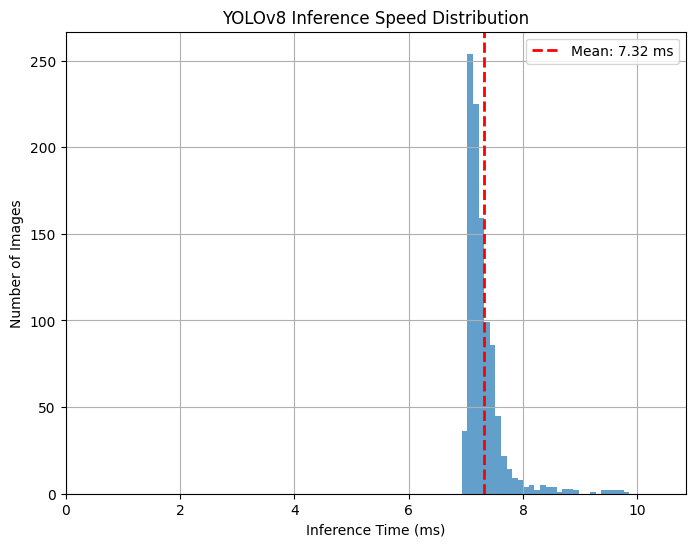

Inference speed distribution saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/inference_speed_distribution.png


In [20]:
#Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

#Set paths
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV410-Processed'
yolov8_model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/weights/best.pt'
test_images_path = os.path.join(dataset_path, 'images', 'test')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Load YOLOv8 model
try:
    yolov8_model = YOLO(yolov8_model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Get the first 1000 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:1000]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]

# Collect inference times
inference_times = []
for img_path in test_image_paths:
    results = yolov8_model.predict(source=img_path, conf=0.5, iou=0.7, save=False, verbose=False)
    for result in results:
        inference_time = result.speed['inference']  # Get inference time (ms)
        inference_times.append(inference_time)

# Convert to numpy array
inference_times = np.array(inference_times)

# Calculate mean inference time
mean_inference_time = np.mean(inference_times)

# Plot inference time distribution histogram
plt.figure(figsize=(8, 6))
plt.hist(inference_times, bins=30, color='#1f77b4', alpha=0.7)
plt.axvline(mean_inference_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_inference_time:.2f} ms')
plt.xlabel('Inference Time (ms)')
plt.ylabel('Number of Images')
plt.title('YOLOv8 Inference Speed Distribution')
plt.grid(True)
plt.legend()

# Set X-axis range
plt.xlim(0, max(inference_times) * 1.1)

speed_dist_path = os.path.join(output_path, 'inference_speed_distribution.png')
plt.savefig(speed_dist_path)
plt.show()
print(f"Inference speed distribution saved to: {speed_dist_path}")